# <font size="7"> Teleco Customer Churn Prediction</font>
## <font size="6">Author : Nandu Krishnan J S</font>
## <font size="6">Submission Date : 30/06/2024</font>

----

# Overview
<font size="5">
Telecom companies face challenges in retaining customers. Customer churn, where customers switch to competitors, is a critical issue affecting profitability. This project aims to develop a predictive model to identify customers at risk of churn based on their usage patterns and demographics.
</font>

-------

# Objective

<font size="5">
<font size="6">The objectives of this project are:</font>
<font size="5">
<ul>
 <li>To gather and preprocess a dataset containing telecom customer information and churn   status.</li>
 <li>To build a machine learning model that predicts customer churn with high accuracy.</li>
 <li>To evaluate the model's performance using relevant metrics such as accuracy, precision, recall.</li>
</ul>
</font>

-----

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df1 = df.copy()
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Description

## Source: The dataset was obtained from Kaggle.
## Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn
## Description: The dataset contains information about telecom customers including demographics, services subscribed, usage patterns, and churn status.
## Size: 7043 x 21
## Features: Include columns such as:
<font size="4">
<ul>
<li>Customer ID</li>
<li>Gender</li>
<li>Senior Citizen (Yes/No)</li>
<li>Partner (Yes/No)</li>
<li>Dependents (Yes/No)</li>
<li>Tenure (in months)</li>
<li>Phone Service (Yes/No)</li>
<li>Multiple Lines (Yes/No)</li>
<li>Internet Service (DSL, Fiber optic, No)</li>
<li>Online Security (Yes/No)</li>
<li>Online Backup (Yes/No)</li>
<li>Device Protection (Yes/No)</li>
<li>Tech Support (Yes/No)</li>
<li>Streaming TV (Yes/No)</li>
<li>Streaming Movies (Yes/No)</li>
<li>Contract (Month-to-month, One year, Two year)</li>
<li>Paperless Billing (Yes/No)</li>
<li>Payment Method (Electronic check, Mailed check,      Bank transfer, Credit card)</li>
<li>Monthly Charges (in dollars)</li>
<li>Total Charges (in dollars)</li>
<li>Churn (Yes/No) - Target variable indicating whether the customer churned or not</li>
</ul>
</font>

# EDA

In [3]:
df1.shape 

(7043, 21)

<font size="5">The dataset has 7043 rows and 21 columns</font>

In [4]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<font size="5">
<ul>
<li> The dataset has no missing values</li>
<li>TotalCharges column has datatype object which should be int or float</li>
<li>The dataset has 3 numeric columns and 18 categorical columns</li>
</ul>
</font>

In [6]:
df1.duplicated().sum()

0

<font size="5">The dataset has no duplicate values</font>

In [7]:
df1.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


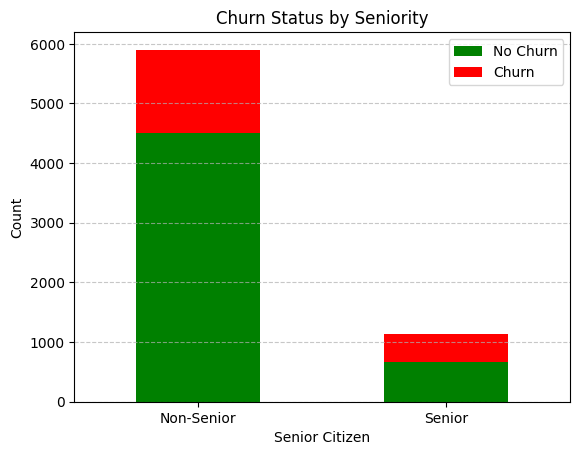

In [8]:
seniority_churn = df1.groupby(['SeniorCitizen','Churn']).size().unstack()
seniority_churn.plot(kind='bar', stacked=True, color=['green', 'red'])

plt.title('Churn Status by Seniority')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(range(len(seniority_churn)),rotation=0, labels=['Non-Senior', 'Senior'])
plt.legend(['No Churn', 'Churn'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<font size="5">
<ul>
<li>Most of the customers are Non-Senior citizens</li>
<li>Senior citizens are more likely to churn.</li>
</ul>
</font>

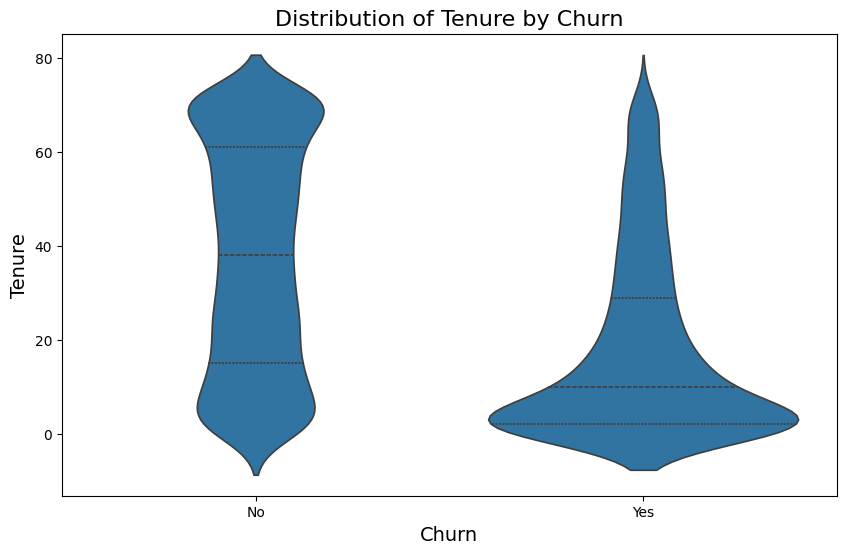

In [9]:
plt.figure(figsize=(10, 6))

sns.violinplot(x='Churn', y='tenure', data=df1, inner='quartile')

plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure', fontsize=14)
plt.title('Distribution of Tenure by Churn', fontsize=16)

plt.show()

<font size="5">This violin plot indicates that new customers are more likely to    churn</font>

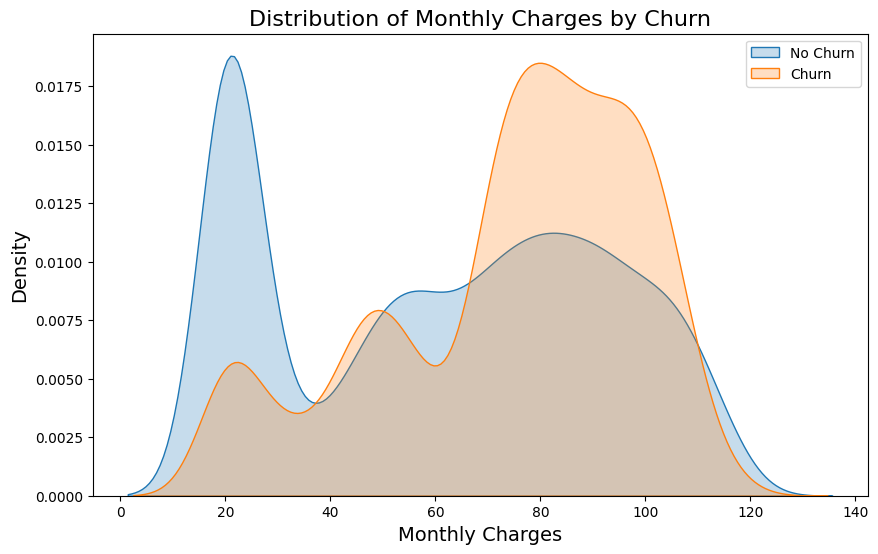

In [10]:
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df1[df1['Churn'] == 'No']['MonthlyCharges'], label='No Churn', fill=True)
sns.kdeplot(data=df1[df1['Churn'] == 'Yes']['MonthlyCharges'], label='Churn', fill=True)

plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Monthly Charges by Churn', fontsize=16)

plt.legend()
plt.show()

<font size="5">Customers are more likely to churn as monthly charges rise.</font>


In [11]:
df1.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

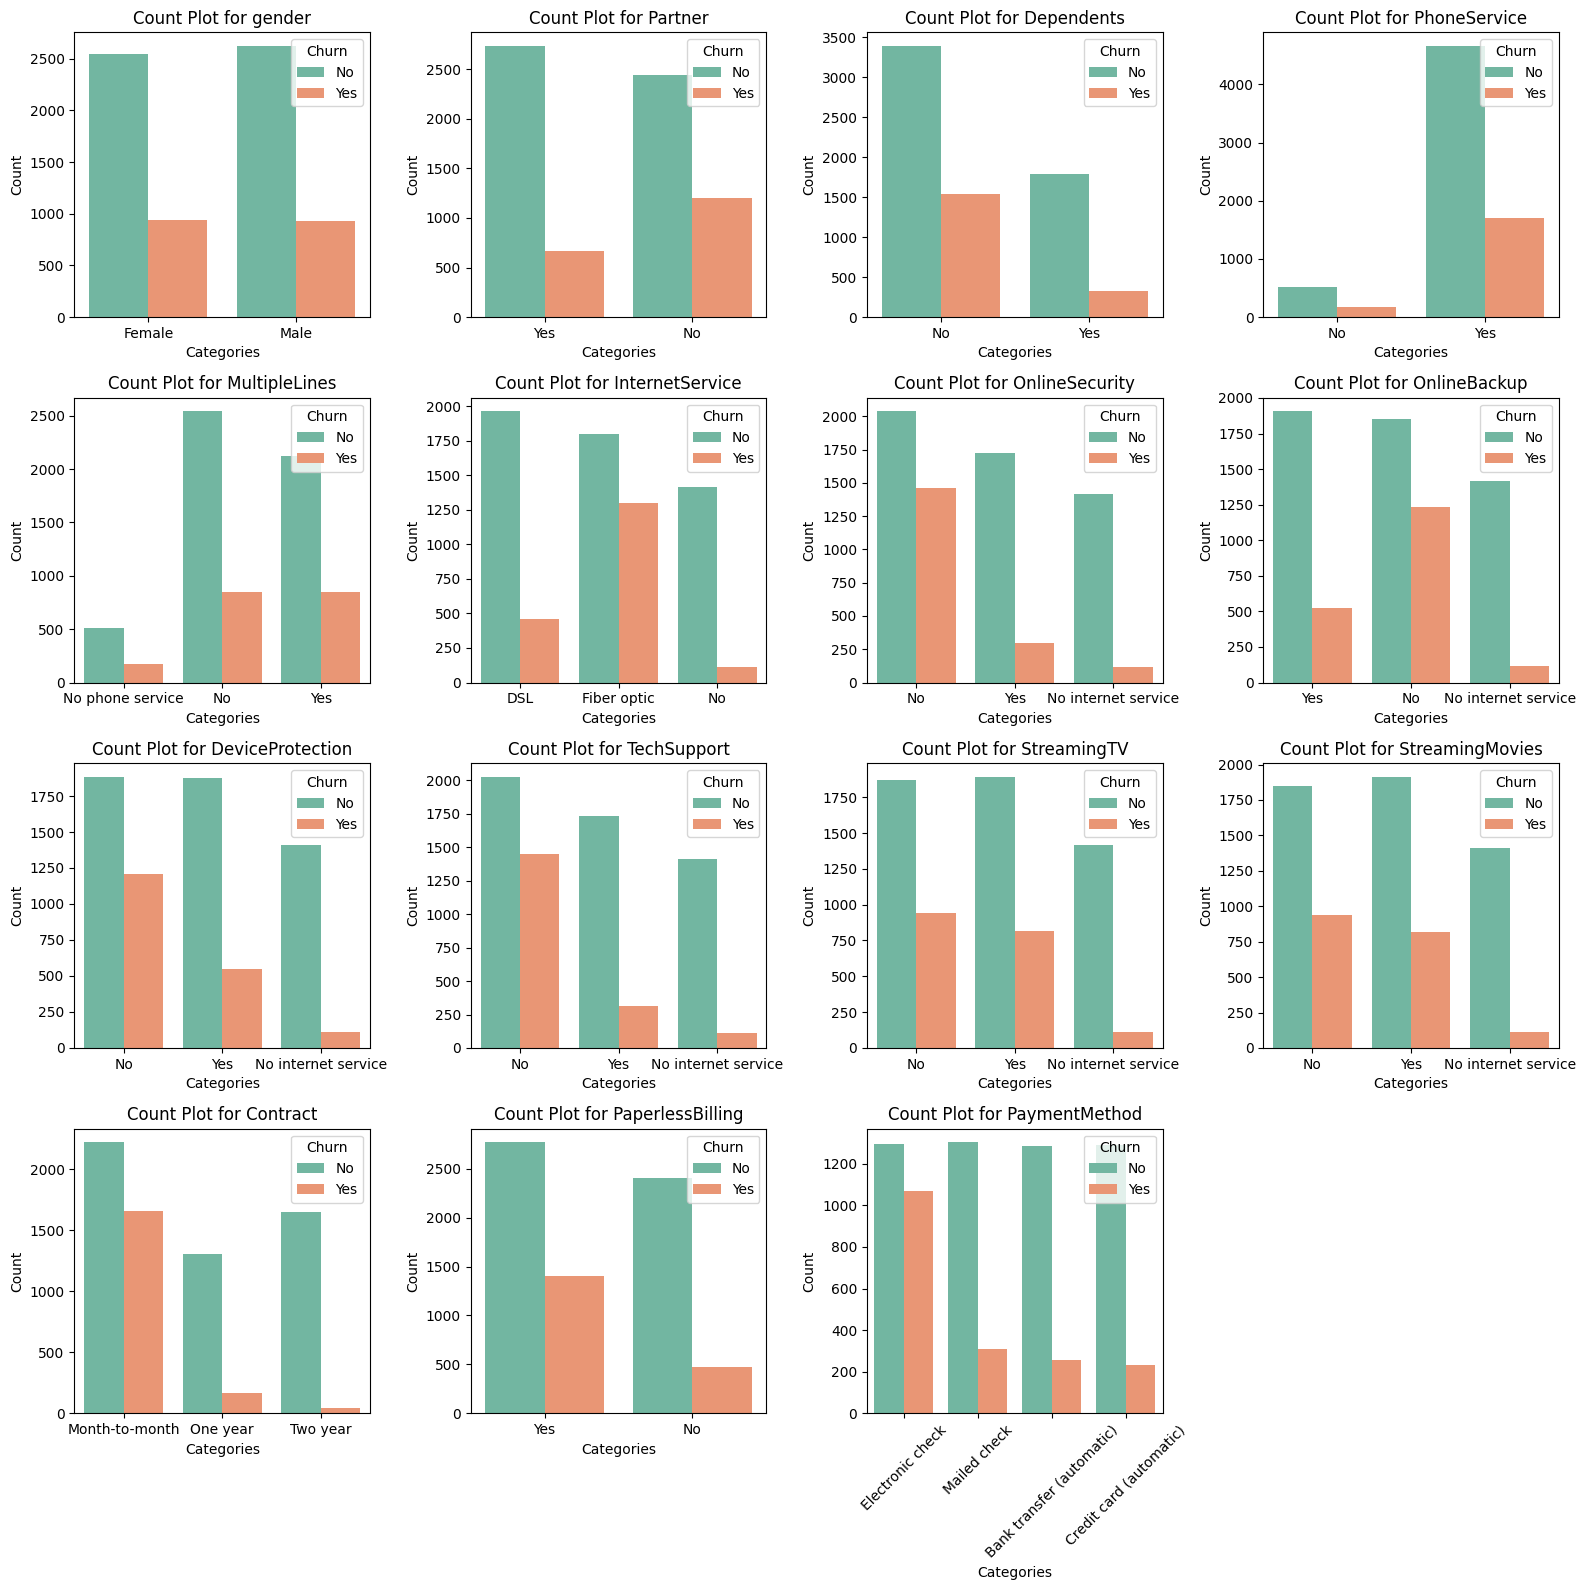

In [12]:
obj_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
plt.figure(figsize=(16, 16))
for i, col in enumerate(obj_cols, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Churn',data=df1, palette='Set2')
    plt.title(f'Count Plot for {col}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<font size="5">
<ul>
<li>Customers who opted for month-to-month contracts have a higher churn rate.</li>
<li>Specifically, customers who opted for electronic check method tend to have a higher churn rate compared to other payment methods.</li>
<li>Customers who do not have a partner, dependents, and have not opted for any additional security or services tend to have a higher churn rate</li>
</ul>
</font>

<Axes: >

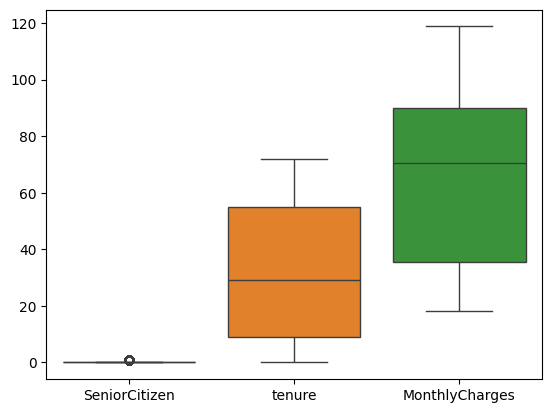

In [13]:
num_cols = df1.select_dtypes(include=['int64','float64']).columns
sns.boxplot(df1[num_cols])

<font size="5"> From Boxplot we can identify there are no outliers</font>

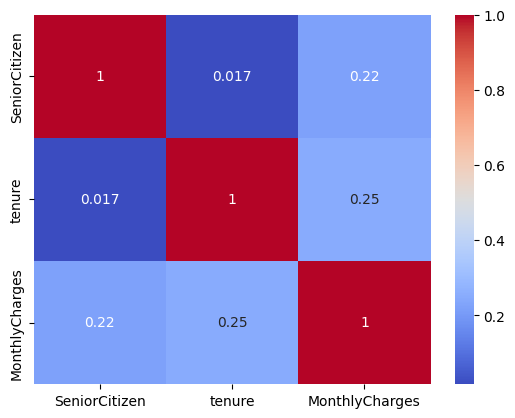

In [14]:
sns.heatmap(df1[num_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

In [15]:
skewness = df1[num_cols].skew()
print(skewness)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64


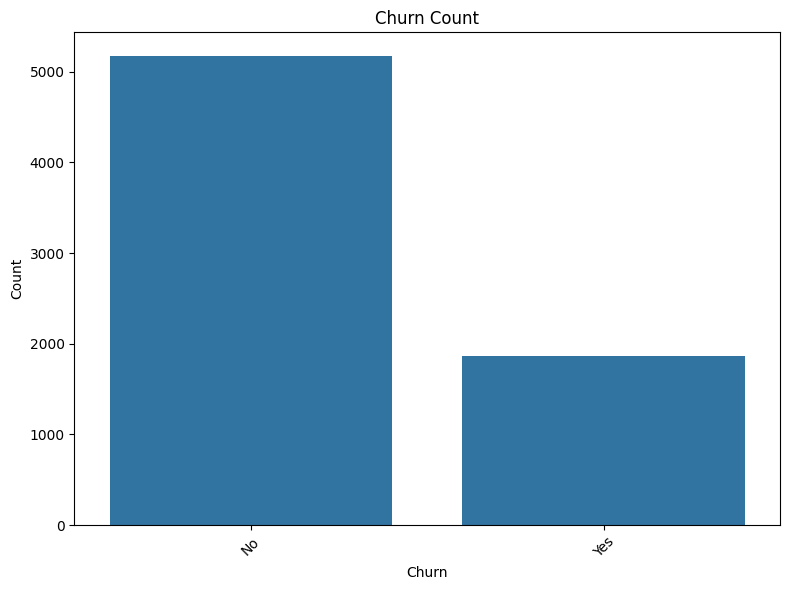

In [16]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Churn',data=df1)

plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

<font size="5">The Bar Chart Shows data is imbalanced</font>

# Data Preprocessing

In [17]:
def get_unique(data,columns):
    for col in columns:
        print(f"Unique Values in {col}")
        print(data[col].unique())
        print(f"No of Unique Values : {data[col].nunique()}")
        print('========================')

In [18]:
get_unique(df1,df1.columns)

Unique Values in customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
No of Unique Values : 7043
Unique Values in gender
['Female' 'Male']
No of Unique Values : 2
Unique Values in SeniorCitizen
[0 1]
No of Unique Values : 2
Unique Values in Partner
['Yes' 'No']
No of Unique Values : 2
Unique Values in Dependents
['No' 'Yes']
No of Unique Values : 2
Unique Values in tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
No of Unique Values : 73
Unique Values in PhoneService
['No' 'Yes']
No of Unique Values : 2
Unique Values in MultipleLines
['No phone service' 'No' 'Yes']
No of Unique Values : 3
Unique Values in InternetService
['DSL' 'Fiber optic' 'No']
No of Unique Values : 3
Unique Values in OnlineSecurity
['No' 'Yes' 'No internet service']
No of Unique Values : 3
Uniq

In [19]:
# Dropping customerID and replacing values
replace_dict = {'No phone service':'No','No internet service':'No'}
df1.replace(replace_dict,inplace=True)
df1.drop('customerID',axis=1,inplace=True)

In [20]:
get_unique(df1,df1.columns)

Unique Values in gender
['Female' 'Male']
No of Unique Values : 2
Unique Values in SeniorCitizen
[0 1]
No of Unique Values : 2
Unique Values in Partner
['Yes' 'No']
No of Unique Values : 2
Unique Values in Dependents
['No' 'Yes']
No of Unique Values : 2
Unique Values in tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
No of Unique Values : 73
Unique Values in PhoneService
['No' 'Yes']
No of Unique Values : 2
Unique Values in MultipleLines
['No' 'Yes']
No of Unique Values : 2
Unique Values in InternetService
['DSL' 'Fiber optic' 'No']
No of Unique Values : 3
Unique Values in OnlineSecurity
['No' 'Yes']
No of Unique Values : 2
Unique Values in OnlineBackup
['Yes' 'No']
No of Unique Values : 2
Unique Values in DeviceProtection
['No' 'Yes']
No of Unique Values : 2
Unique Values in TechSupport
['No' 'Yes']
No of

In [21]:
# changing the totalcharges to float datatype
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
df1.dropna(inplace=True)
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

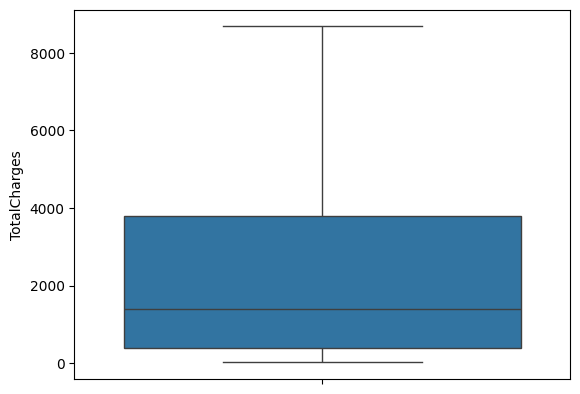

In [23]:
sns.boxplot(df1['TotalCharges'])
plt.show()

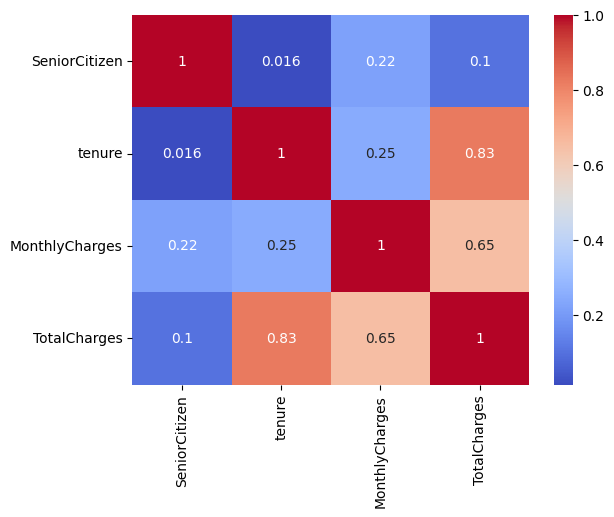

In [24]:
num_cols = df1.select_dtypes(include=['int64','float64']).columns
sns.heatmap(df1[num_cols].corr(),annot=True,cmap='coolwarm')
plt.show()

<font size="5">Tenure and TotalCharges are highly correlated</font>

In [25]:
# Checking Outliers
out_cols = ['tenure','TotalCharges','MonthlyCharges']
for col in out_cols:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    IQR = q3 - q1
    lower_whis = q1-1.5*IQR
    upper_whis = q3 + 1.5*IQR
    outliers_col = df1[(df1[col]<lower_whis) | (df1[col]>upper_whis)]
    print(f"IQR of {col}: {IQR}")
    print(f' No of outliers in {col}:{len(outliers_col)}')
    print('-------------------')

IQR of tenure: 46.0
 No of outliers in tenure:0
-------------------
IQR of TotalCharges: 3393.2875000000004
 No of outliers in TotalCharges:0
-------------------
IQR of MonthlyCharges: 54.275
 No of outliers in MonthlyCharges:0
-------------------


# Feature Transformation

In [26]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [27]:
df_final = df1.copy()

In [28]:

obj_cols = df_final.select_dtypes(include='object').columns
label_encoders = {}

for col in obj_cols:
    label_encoders[col] = LabelEncoder()
    df_final[col] = label_encoders[col].fit_transform(df_final[col])

df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [29]:
# Scaling the numerical columns with minmaxscaler

num_cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df_final[num_cols] = scaler.fit_transform(df_final[num_cols])
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


# Data Splitting and Model Selection

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score,confusion_matrix

In [31]:
X = df_final.drop('Churn',axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0.000000,0,0,0,0,1,0,0,0,0,0,1,2,0.115423,0.001275
1,1,0,0,0,0.464789,1,0,0,1,0,1,0,0,0,1,0,3,0.385075,0.215867
2,1,0,0,0,0.014085,1,0,0,1,1,0,0,0,0,0,1,3,0.354229,0.010310
3,1,0,0,0,0.619718,0,0,0,1,0,1,1,0,0,1,0,0,0.239303,0.210241
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,0,1,0,1,1,1,1,1,1,3,0.662189,0.227521
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,1,0.845274,0.847461
7040,0,0,1,1,0.140845,0,0,0,1,0,0,0,0,0,0,1,2,0.112935,0.037809
7041,1,1,1,0,0.042254,1,1,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210


In [32]:
y=df_final['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [33]:
def evaluate_models(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),
        'KNN': KNeighborsClassifier()
    }
    
    roc_auc_scores = {}
    fpr = {}
    tpr = {}

    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        # Predictions
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] 
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"=== {name} ===")
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        print(f"Confusion matrix of {name}")
        plt.figure(figsize=(4,3))
        sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
        
        # ROC Curve
        fpr[name], tpr[name], _ = roc_curve(y_test, y_prob)
        roc_auc_scores[name] = roc_auc_score(y_test, y_prob)

        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr[name], tpr[name], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[name])
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
        
        print("\n")

=== Logistic Regression ===
Accuracy: 0.7918
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407

Confusion matrix of Logistic Regression


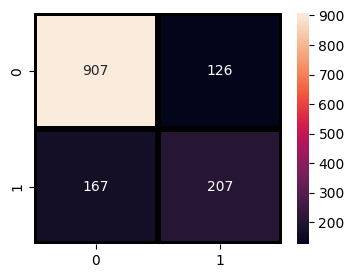

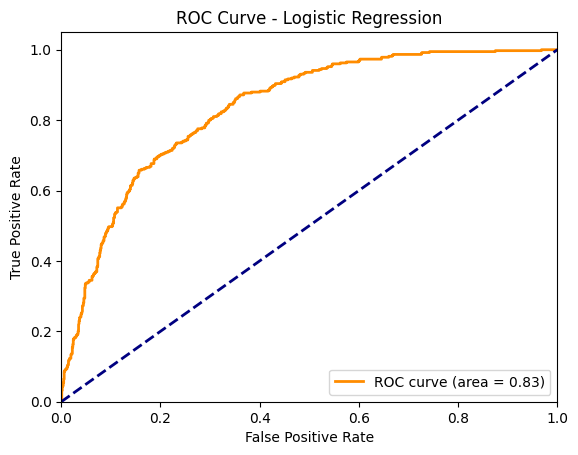



=== Random Forest ===
Accuracy: 0.7918
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion matrix of Random Forest


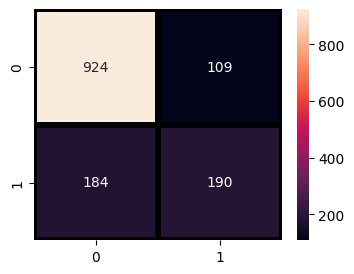

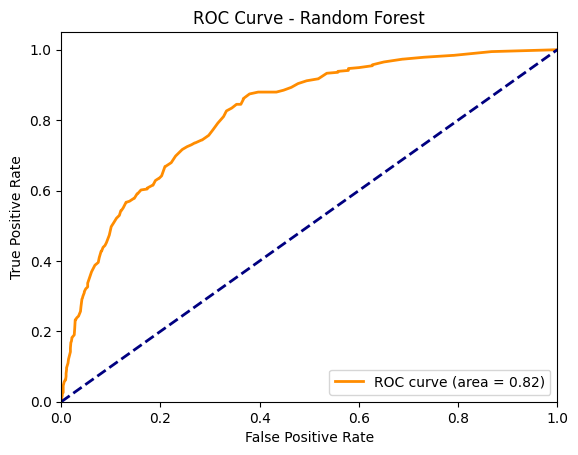



=== Decision Tree ===
Accuracy: 0.7114
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1033
           1       0.46      0.53      0.49       374

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.71      0.72      1407

Confusion matrix of Decision Tree


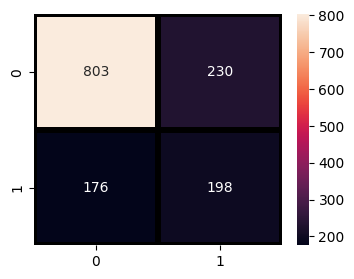

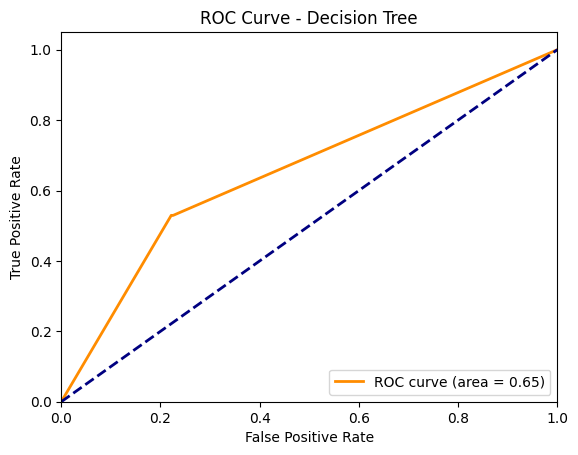



=== SVM ===
Accuracy: 0.7861
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Confusion matrix of SVM


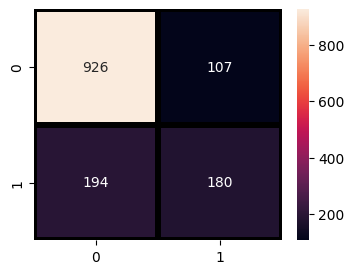

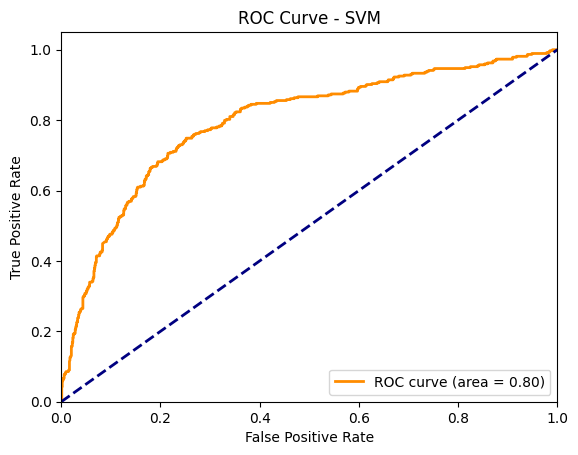



=== KNN ===
Accuracy: 0.7491
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1033
           1       0.53      0.57      0.55       374

    accuracy                           0.75      1407
   macro avg       0.68      0.69      0.69      1407
weighted avg       0.76      0.75      0.75      1407

Confusion matrix of KNN


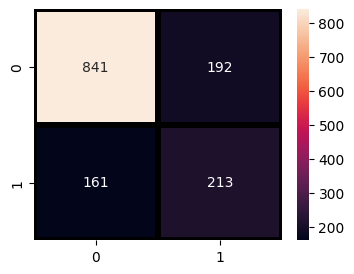

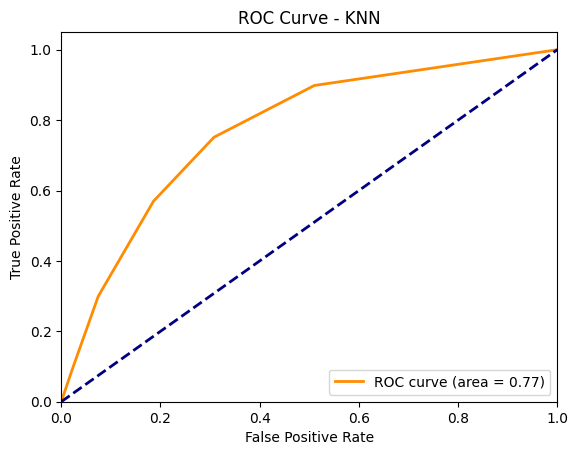

In [34]:
evaluate_models(X,y)

<font size="5">In this case, Logistic Regression has the highest accuracy of 79%, but due to data imbalance, the model performs poorly on the minority class.</font>

# Balancing the Data using SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X,y)
print(f"shape of X_resampled: {X_resampled.shape}")
print(f"shape of y_resampled: {y_resampled.shape}")

shape of X_resampled: (10326, 19)
shape of y_resampled: (10326,)


=== Logistic Regression ===
Accuracy: 0.7798
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1033
           1       0.75      0.83      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

Confusion matrix of Logistic Regression


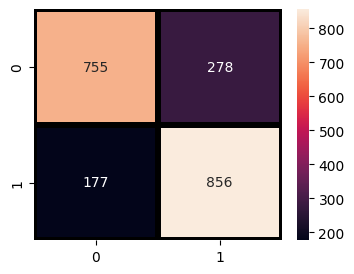

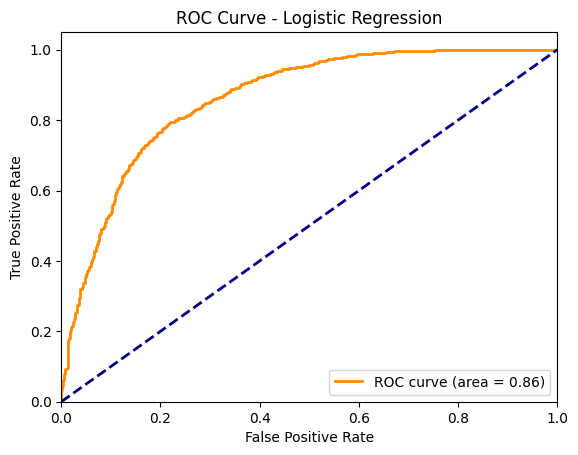



=== Random Forest ===
Accuracy: 0.8262
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1033
           1       0.80      0.86      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

Confusion matrix of Random Forest


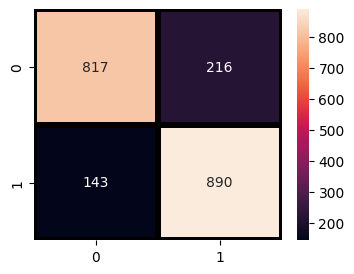

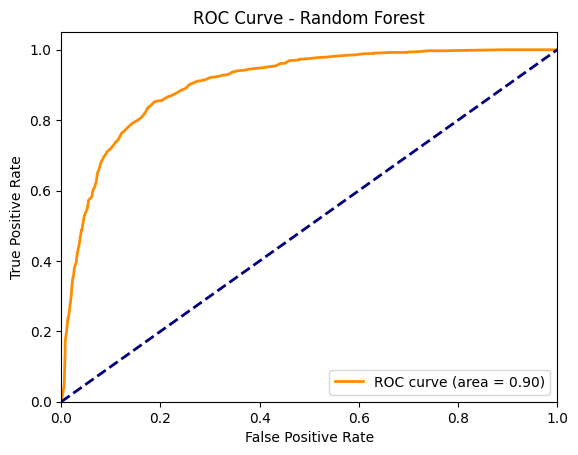



=== Decision Tree ===
Accuracy: 0.7599
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1033
           1       0.75      0.77      0.76      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066

Confusion matrix of Decision Tree


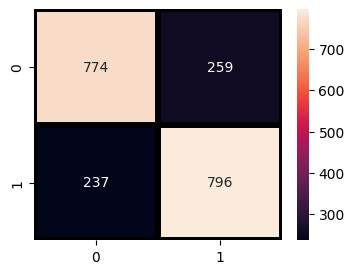

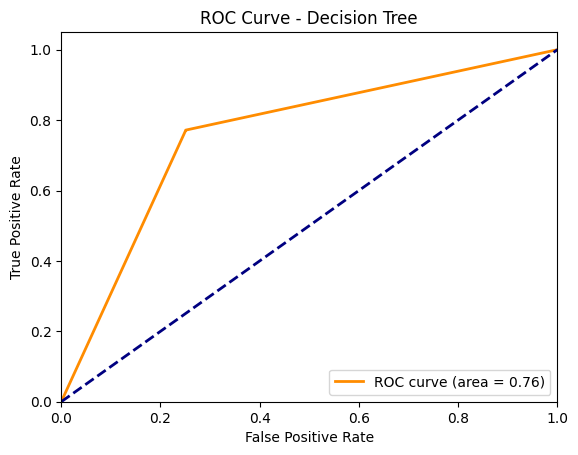



=== SVM ===
Accuracy: 0.7836
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77      1033
           1       0.76      0.83      0.79      1033

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066

Confusion matrix of SVM


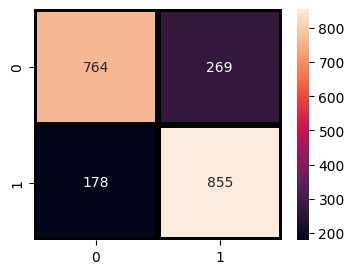

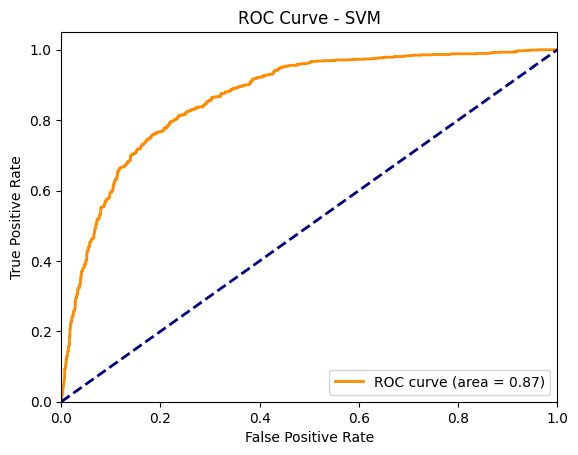



=== KNN ===
Accuracy: 0.8001
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1033
           1       0.75      0.90      0.82      1033

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

Confusion matrix of KNN


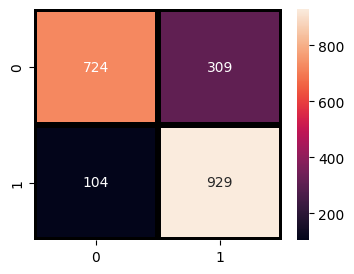

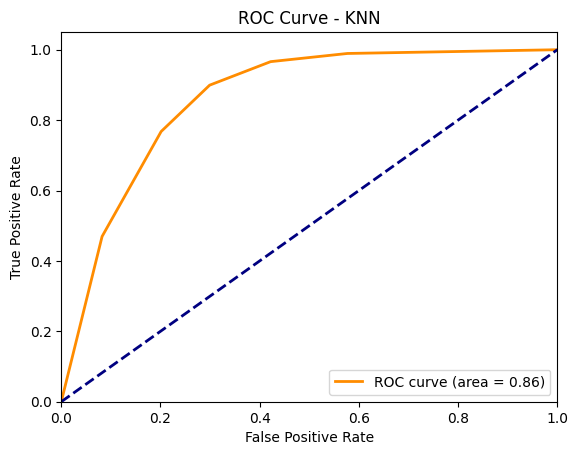

In [36]:
evaluate_models(X_resampled, y_resampled)

<font size="5">In this case, Random Forest has the highest accuracy of 83%, and the model performs good on both the classes.</font>

# Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif

def evaluate_models_with_feature_selection(X, y, num_features=10):
    
    selector = SelectKBest(score_func=f_classif, k=num_features)
    X_selected = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]

    print(f"Selected Features: {selected_features.tolist()}")

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)
    
    
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'SVM': SVC(probability=True),  # Use probability=True for ROC curve
        'KNN': KNeighborsClassifier()
    }

    roc_auc_scores = {}
    fpr = {}
    tpr = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]  
        
        # Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"=== {name} ===")
        print(f"Accuracy: {accuracy:.4f}")
        
        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Confusion Matrix
        plt.figure(figsize=(4,3))
        sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
        
        # ROC Curve
        fpr[name], tpr[name], _ = roc_curve(y_test, y_prob)
        roc_auc_scores[name] = roc_auc_score(y_test, y_prob)
        
        # Plot ROC Curve
        plt.figure()
        plt.plot(fpr[name], tpr[name], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_scores[name])
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {name}')
        plt.legend(loc="lower right")
        plt.show()
        
        print("\n")

Selected Features: ['Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
=== Logistic Regression ===
Accuracy: 0.7648
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75      1033
           1       0.73      0.84      0.78      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



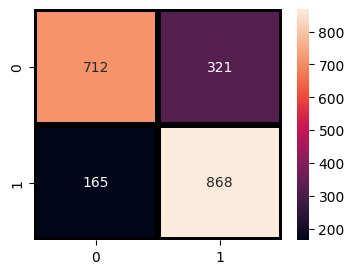

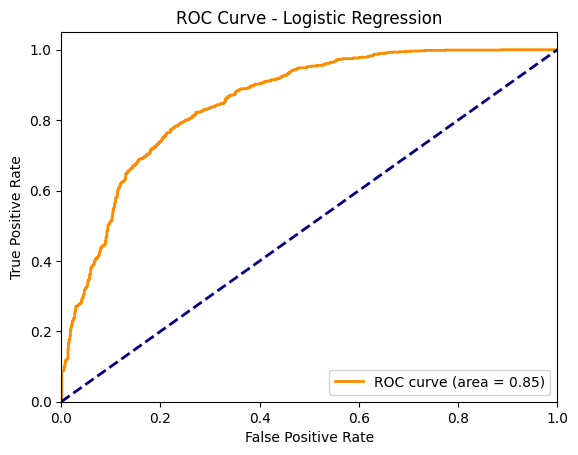



=== Random Forest ===
Accuracy: 0.7982
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1033
           1       0.78      0.83      0.80      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



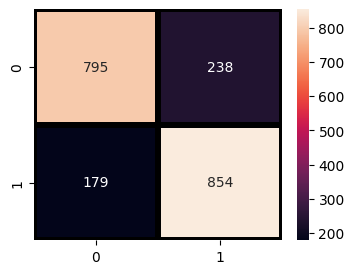

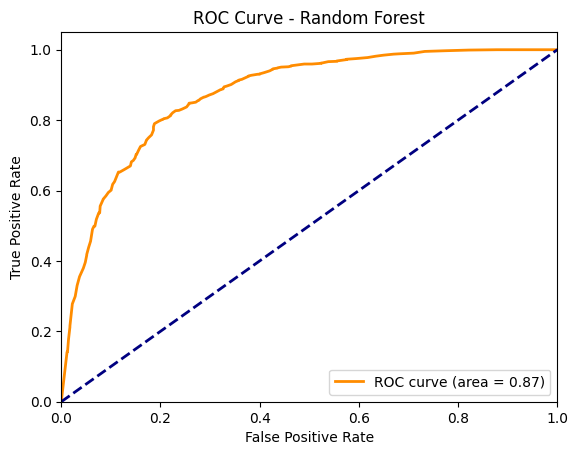



=== Decision Tree ===
Accuracy: 0.7507
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1033
           1       0.75      0.76      0.75      1033

    accuracy                           0.75      2066
   macro avg       0.75      0.75      0.75      2066
weighted avg       0.75      0.75      0.75      2066



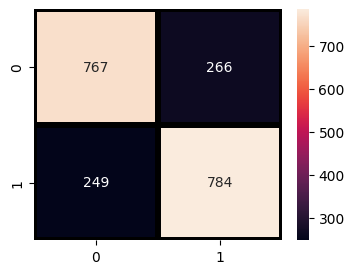

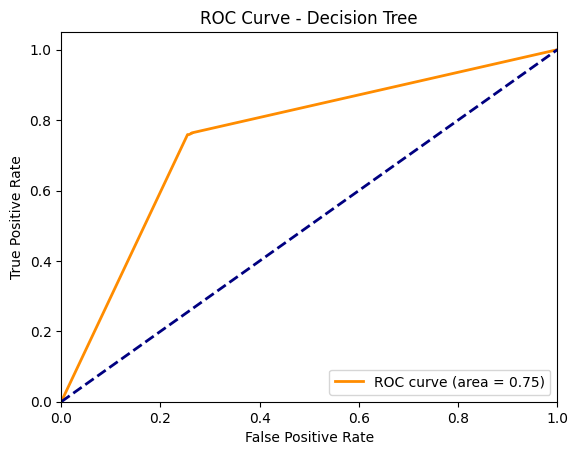



=== SVM ===
Accuracy: 0.7643
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.67      0.74      1033
           1       0.72      0.86      0.78      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



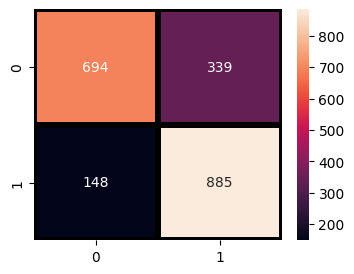

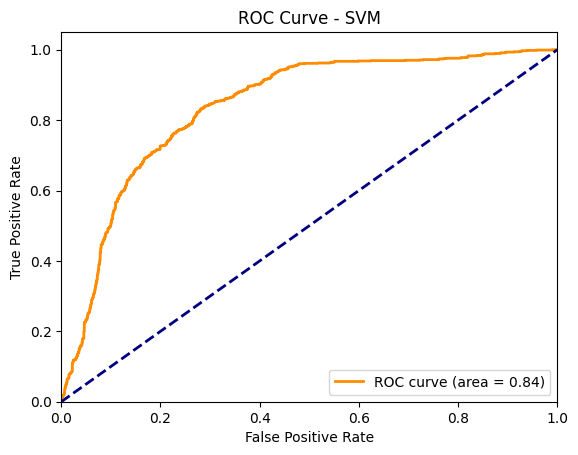



=== KNN ===
Accuracy: 0.7696
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



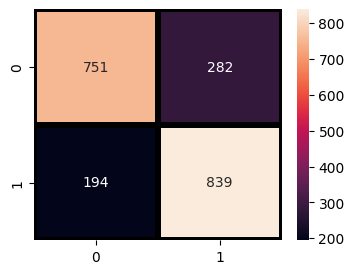

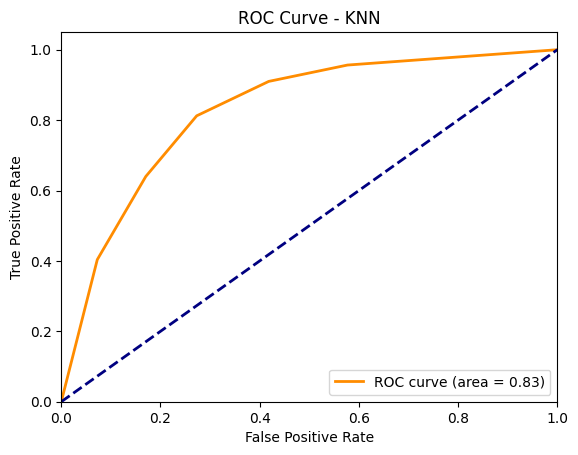

In [38]:
evaluate_models_with_feature_selection(X_resampled, y_resampled)

# Hyperparameter Tuning

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, stratify=y_resampled, random_state=42)

In [40]:
# Define hyperparameter grids for each model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10,
20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2,
5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001,
0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
# Models
models = {
 'Logistic Regression': (LogisticRegression(), param_grid_lr),
 'Random Forest': (RandomForestClassifier(), param_grid_rf),
 'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
 'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 11],
'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree',
'kd_tree', 'brute']}),
 'Naive Bayes': (GaussianNB(), {})
}
# Performing hyperparameter tuning for each model
best_models = {}
for name, (model, param_grid) in models.items():
 grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
cv=5, scoring='accuracy')
 grid_search.fit(X_train, y_train)
 best_models[name] = grid_search.best_estimator_
# Print best hyperparameters for each model
for name, model in best_models.items():
 print(f"Best hyperparameters for {name}: {model}")
# Evaluate best models on test set
results = {}
for name, model in best_models.items():
 results[name] = model.score(X_test, y_test)
# Print test accuracy for each model
for name, accuracy in results.items():
 print(f"Test accuracy for {name}: {accuracy}")

Best hyperparameters for Logistic Regression: LogisticRegression(C=100)
Best hyperparameters for Random Forest: RandomForestClassifier(n_estimators=200)
Best hyperparameters for Decision Tree: DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)
Best hyperparameters for KNN: KNeighborsClassifier(n_neighbors=3)
Best hyperparameters for Naive Bayes: GaussianNB()
Test accuracy for Logistic Regression: 0.7802516940948693
Test accuracy for Random Forest: 0.8286544046466602
Test accuracy for Decision Tree: 0.7754114230396902
Test accuracy for KNN: 0.8000968054211036
Test accuracy for Naive Bayes: 0.7628267182962246


## Random Forest has the best performance comparing to other models with an accuracy of 83%

# Saving Model

In [41]:
import joblib
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, stratify=y_resampled, random_state=42)

model = RandomForestClassifier(max_depth=20, n_estimators=200,random_state=42)

model.fit(X_train, y_train)

filename = 'random_forest_model.sav'
joblib.dump(model, filename)

['random_forest_model.sav']